# Estudo Sobre Consumidores
Base de dados:https://consumidor.gov.br/pages/principal/?1594Base 


Dois mundos ainda dividem as relações de consumo no Brasil: o pré e o pós-venda. No primeiro, os atendentes estão sempre disponíveis, o cliente é tratado cordialmente e é possível acessar a empresa por todos os canais. Já no segundo, especialmente após se deparar com um problema, o consumidor recebe um atendimento insatisfatório e encontra inúmeras dificuldades para acessar a companhia. 

O estudo de caso é sobre empresas nacionais e internacionais. O estudo relata a quantidade de reclamações feita pelo consumidore com diferente tipo de idade. Vamos estudar quais empresas tem o maior numero de reclamações e quais empresas tem feito a sua parte para ajudar os consumidores.


Vamos para o nosso estudo de caso.



In [1]:
#pip install plotly

In [22]:
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)



Base de Dados

In [23]:
dados = pd.read_csv('2_semestre_2016.csv', encoding='latin', sep=';')

In [24]:
dados.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,NE,PI,São Raimundo Nonato,M,entre 21 a 30 anos,30/07/2016,0.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança após cancelamento do serviço,Loja física,S,S,Finalizada avaliada,Resolvida,4.0,1
1,CO,GO,Aparecida de Goiânia,F,entre 21 a 30 anos,30/07/2016,0.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Atendimento / SAC,Má qualidade no atendimento presencial ou outr...,Domicílio,S,S,Finalizada avaliada,Não Resolvida,5.0,1
2,SE,SP,Mogi das Cruzes,M,entre 41 a 50 anos,31/07/2016,0.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pré-paga,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,1
3,SE,SP,Mogi das Cruzes,M,entre 41 a 50 anos,30/07/2016,0.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Pacote de Serviços ( Combo ),Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,1
4,SE,MG,Oliveira,F,até 20 anos,30/07/2016,1.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Demais aparelhos de comunicação,Cobrança / Contestação,Dificuldade na devolução de valores pagos / re...,Não comprei / contratei,N,S,Finalizada avaliada,Resolvida,3.0,1


Na base de dados temos uma relação de cidade, sexo, data da reclamação, segmento de mercado, assunto, problemas.
Não vou usar todos os dados, porque o meu estudo vai ser pelas reclamações dos clientes com todas as mepresas. 
Futuramente usarei a base de dados para fazer um estudo da Área, onde obteremos um segmento especifico. 

In [25]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Tempo Resposta,161993.0,6.440247,3.378037,0.0,3.0,8.0,9.0,12.0
Nota do Consumidor,95118.0,3.320108,1.696041,1.0,1.0,4.0,5.0,5.0
Total,162584.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


### NUMERO DE RECLAMAÇÃO POR ESTADO

Fiz um agrupamento de todas as reclamações separado por estado. No momento não separei por reclamaçõe. 


In [26]:
dados.groupby('UF')['UF'].count()

UF
AC      554
AL      647
AM     1026
AP      173
BA     8269
CE     5362
DF     7057
ES     3612
GO     4355
MA     1572
MG    14356
MS     1548
MT     4108
PA     1721
PB     1586
PE     4192
PI      908
PR    15107
RJ    16895
RN     1238
RO      565
RR      220
RS    14615
SC     4898
SE      750
SP    44905
TO     2345
Name: UF, dtype: int64

### QUANTIDADE DE RECLAMAÇÕES POR SEXO 

A satisfação pode ser definida, de acordo com Kotler (1998, p. 53), como "o sentimento de prazer ou de desapontamento resultante da comparação do desempenho esperado pelo produto (ou resultado) em relação às expectativas da pessoa". Satisfação não é deixar o cliente surpreso ou alegre, mas atender ou superar as suas expectativas, de modo que fique a contento com os resultados. O consumidor deve perceber que a troca foi justa, recebendo da empresa um valor que corresponda aos esforços despendidos. Para a empresa, este comprometimento com a satisfação do consumidor deverá ser recompensado, pois hoje há suporte empírico para comprovar que resultados elevados de satisfação dos clientes podem ser acompanhados por uma rentabilidade superior a médio prazo (Anderson, Fornell, & Lehmann, 1994; Anderson & Mittal, 1999).

O estudo revela, pessoas do sexo masculino fizeram mais reclamações. 

In [27]:
dados['Sexo'].value_counts()

M    95462
F    67122
Name: Sexo, dtype: int64

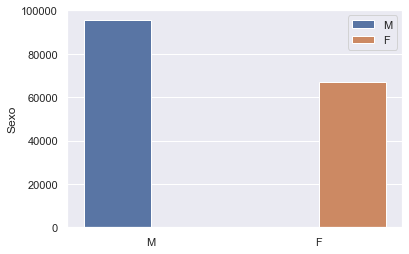

In [28]:

sns.set(style="darkgrid")
sexo = dados[u'Sexo'].unique()
cont = dados[u'Sexo'].value_counts()
sns.barplot(x=sexo,y=cont,hue=sexo)
plt.show()

### FAIXA ETÁRIA DE CONSUMDORES

O estudo revela o perfil dos consumidores. Vamos pegar como base de estudo, idade entre 21 a 30 anos e entre 61 a 70 anos. 

O estudo mostra que são jovens, que estão no melhor momento de compras, pode ser que esteja bem empregado. Observando as pessoas mais novas temos como os maiores consumidores o sexo masculino. Precisamos observar porque os homens nessa faixa etária têm consumido mais dos que as mulheres. 
Quando chega a fase adulta, temos um quadro totalmente oposto, consumidores que gastam bem menos. O normal que os gastos fixos tenham caído, como por exemplo escola educação e preparo de filhos. Mais uma vez temos pessoas do sexo masculino que gastam bem mais do que a do sexo feminino.
 

In [29]:
dados.groupby('Faixa Etária')['Sexo'].value_counts()

Faixa Etária        Sexo
até 20 anos         M        3170
                    F        1958
entre 21 a 30 anos  M       33597
                    F       20470
entre 31 a 40 anos  M       31049
                    F       19617
entre 41 a 50 anos  M       13501
                    F       10626
entre 51 a 60 anos  F        8306
                    M        8171
entre 61 a 70 anos  M        4260
                    F        4242
mais de 70 anos     F        1903
                    M        1714
Name: Sexo, dtype: int64

### COMPRAS PELA INTERNET

Temos uma disparidade em relação entre a faixa etaria 21 a 30 anos do que 61 a 70 anos. O público mais jovem nasceu na era digital e já está familiarizado com a internet. Para as pessoas desse grupo, é natural comprar em lojas virtuais, entretanto, quem não cresceu acompanhando as tendências digitais pode se sentir inseguro ao disponibilizar os seus dados e a acreditar que os produtos serão entregues em casa sem problemas.

Daí a necessidade de conquistar a confiança do nicho da terceira idade, mostrando que as compras virtuais são procedimentos seguros e eficientes. Frisar pontos como garantia de entrega, prazos, descontos e políticas de trocas transparentes é fundamental para fortalecer a confiança das marcas com os idosos.

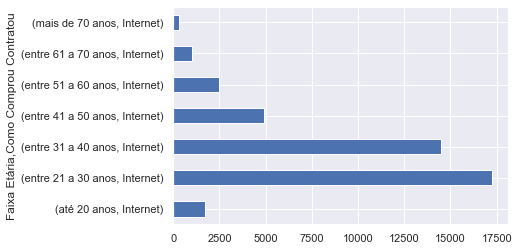

In [30]:
base = dados[dados['Como Comprou Contratou']=='Internet']
base.groupby('Faixa Etária')['Como Comprou Contratou'].value_counts().plot.barh()
plt.show()

### REGISTRO DE RECLAMAÇÃO
Parece que os consumidores brasileiros são bem amigáveis, tentam de tudo para combinar com as empresas, o gráfico mostrar que antes de procurar plataformas de reclamação ou meios jurídicos, os consumidores tentam entrar em contato com as empresas. Temos algo em comum entrar as faixas etárias do nosso estudo. Pessoas com a faixa etária de 21 a 30 anos como pessoas da faixa etária de 51 a 60 procuram as empresas antes de registrar uma reclamação.

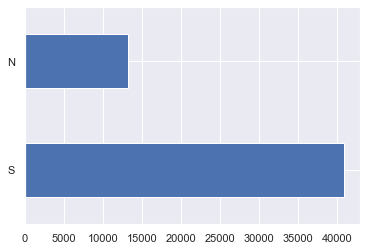

In [31]:
base = dados[dados['Faixa Etária']=='entre 21 a 30 anos']
base['Procurou Empresa'].value_counts().plot.barh()
plt.show()

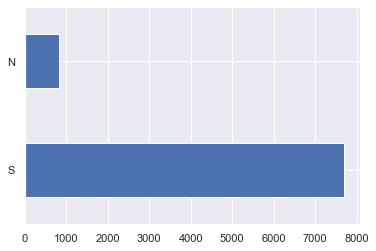

In [32]:
base = dados[dados['Faixa Etária']=='entre 61 a 70 anos']
base['Procurou Empresa'].value_counts().plot.barh()
plt.show()

### QUAL O GRUPO DE PROBLEMAS MAIS COMUM?
Cobranças indevidas é o campeão em numeros de reclamações. Desde cobranças indevidas tem tirado o sono de muitos brasileros. para ter um boa relação com os consumidores, as empresas devem criar mecanismo para cuidar dos consumidores, criar meios de anti fraude. Proteger o consumidor é proteger o relacionamento cliente empresa.



In [33]:
dados['Grupo Problema'].value_counts()

Cobrança / Contestação    67074
Contrato / Oferta         29460
Vício de Qualidade        20832
Atendimento / SAC         19883
Informação                18322
Entrega do Produto         6403
Saúde e Segurança           610
Name: Grupo Problema, dtype: int64

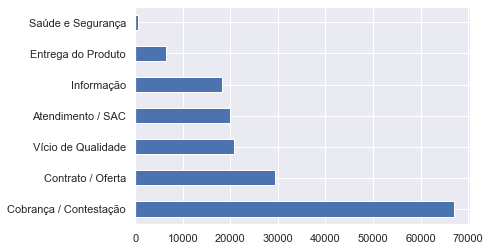

In [34]:
dados['Grupo Problema'].value_counts().plot.barh()
plt.show()

Relação das reclamações

In [35]:
dados[dados['Grupo Problema'] == u'Cobrança / Contestação'][u'Problema'].value_counts()

Cobrança por serviço/produto não contratado / não reconhecido / não solicitado                            17480
Dificuldade na devolução de valores pagos / reembolso / retenção de valores                                7715
Dificuldade na Renegociação / parcelamento de dívida                                                       7512
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo                          5977
Cobrança após cancelamento do serviço                                                                      5134
Cobrança de tarifas, taxas, valores não previstos / não informados                                         4939
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                                       3967
Cálculo de juros, saldo devedor (contestação, solicitação de histórico, dúvidas)                           3118
Cobrança submetendo a ofensa, constrangimento ou ameaça                                                 

### QUANTIDADE DE RECLAMAÇÃO POR SEGMENTOS

Empresas de telecomunicações, ganham disparada em reclamação. Clientes estão insatisfeito com os serviços prestado pelas companhias de telecomunicação, desde cobranças indevidas, internet lenta serviços não entregue. Tudo isso tem deixado clientes irritados. Mas não é só a telefonia. EM segundo lugar temos empresas financeiras, cartão de crédito é a dor de cabeça dos consumidores, cartão clonado, fraude em compras tem feito clientes abandonar as compras online.


In [36]:
dados['Segmento de Mercado'].value_counts()

Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    73929
Bancos, Financeiras e Administradoras de Cartão                            37912
Bancos de Dados e Cadastros de Consumidores                                18069
Comércio Eletrônico                                                        14417
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       4364
Varejo                                                                      2169
Transporte Aéreo                                                            2086
Corretoras e Sociedades de Seguros, Capitalização e Previdência             1360
Energia Elétrica, Gás, Água e Esgoto                                        1313
Operadoras de Planos de Saúde e Administradoras de Benefícios                984
Perfumaria, Cosméticos e Higiene Pessoal                                     929
Programas de Fidelidade                                                      927
Fabricantes - Linha Branca  

Segmentos de Mercado com maior número de reclamações do tipo de problema Cobrança e Contestação

In [37]:
segmento = dados[dados[u'Grupo Problema']==u'Cobrança / Contestação']
segmento['Segmento de Mercado'].value_counts()


Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    36106
Bancos, Financeiras e Administradoras de Cartão                            21829
Comércio Eletrônico                                                         3144
Bancos de Dados e Cadastros de Consumidores                                  998
Transporte Aéreo                                                             733
Energia Elétrica, Gás, Água e Esgoto                                         691
Empresas de Recuperação de Crédito                                           597
Varejo                                                                       553
Operadoras de Planos de Saúde e Administradoras de Benefícios                406
Perfumaria, Cosméticos e Higiene Pessoal                                     404
Corretoras e Sociedades de Seguros, Capitalização e Previdência              384
Agências de Viagens                                                          381
Administradoras de Consórcio

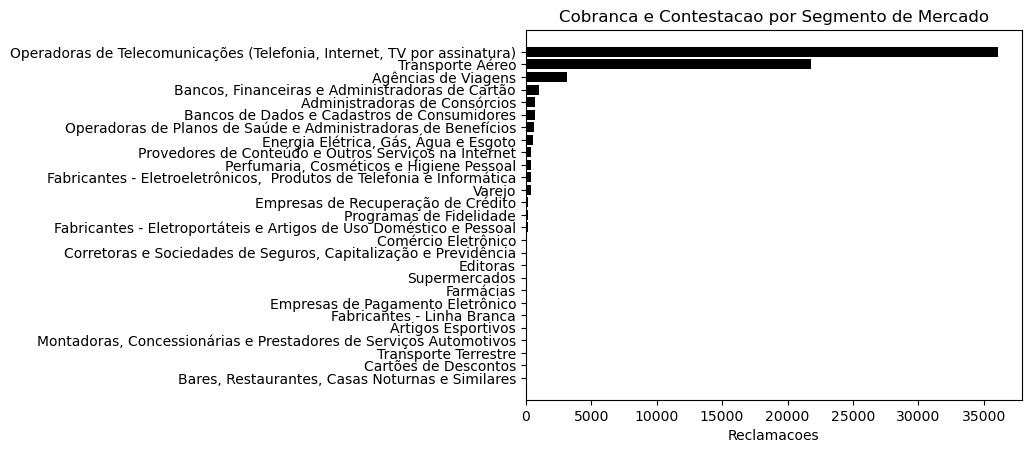

In [38]:
plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(segmento['Segmento de Mercado'].value_counts()))
values = segmento['Segmento de Mercado'].value_counts()
segmentos = segmento['Segmento de Mercado'].unique()

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Cobranca e Contestacao por Segmento de Mercado')

plt.show()

### RANK DAS TOP 20 EM RECLAMAÇÕES

O gráfico diz tudo. Empresas de telecomunicação lideram nas reclamações.

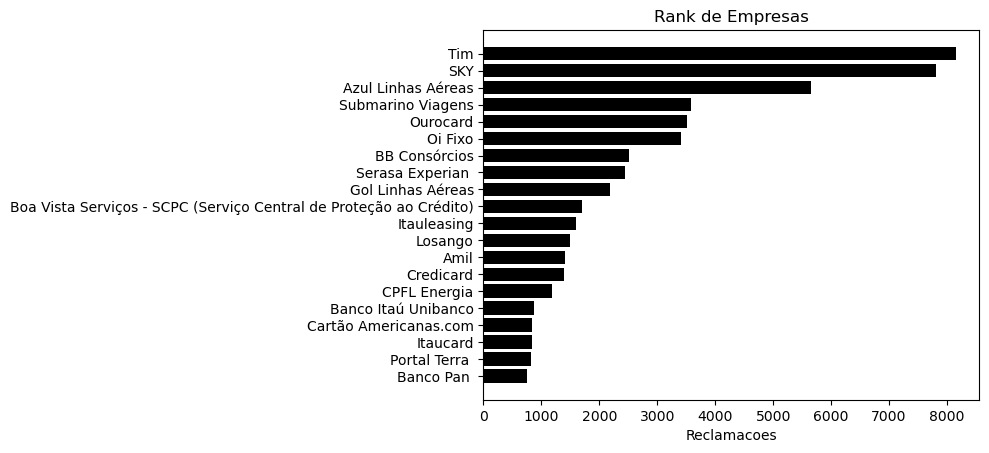

In [40]:
fig, ax = plt.subplots()

y_pos = np.arange(len(segmento['Nome Fantasia'].value_counts()[:20]))
values = segmento['Nome Fantasia'].value_counts()[:20]
segmentos = segmento['Nome Fantasia'].unique()[:20]

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Rank de Empresas')

plt.show()

Listagem e contagem de problemas do grupo.

In [41]:
dados[dados['Grupo Problema']=='Cobrança / Contestação']['Problema'].value_counts()

Cobrança por serviço/produto não contratado / não reconhecido / não solicitado                            17480
Dificuldade na devolução de valores pagos / reembolso / retenção de valores                                7715
Dificuldade na Renegociação / parcelamento de dívida                                                       7512
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo                          5977
Cobrança após cancelamento do serviço                                                                      5134
Cobrança de tarifas, taxas, valores não previstos / não informados                                         4939
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                                       3967
Cálculo de juros, saldo devedor (contestação, solicitação de histórico, dúvidas)                           3118
Cobrança submetendo a ofensa, constrangimento ou ameaça                                                 

Tempo de resposta tem alguma correlação com a nota do consumidor?

In [42]:
import pandas as pd

df = dados.drop('Total',axis=1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Tempo Resposta,Nota do Consumidor
Tempo Resposta,1.000000,-0.118709
Nota do Consumidor,-0.118709,1.000000


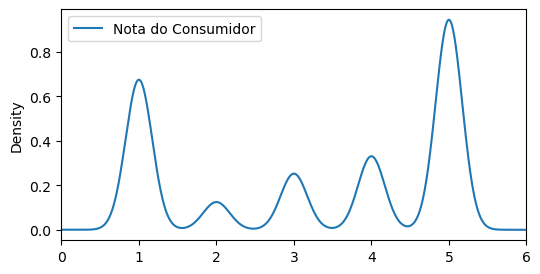

In [44]:
dados.plot.density(y='Nota do Consumidor',xlim=[0,6],figsize=[6,3])
plt.show()

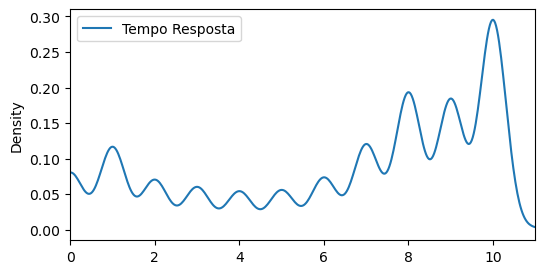

In [46]:
dados.plot.density(y='Tempo Resposta',xlim=[0,11],figsize=[6,3])
plt.show()

Proporção de reclamações registradas e não respondidas

In [49]:
x = dados.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()

#Filtrando os segmentos de mercado com mais de 20 reclamações
x = x[x > 20]


In [51]:
df = dados[dados[u'Segmento de Mercado'].isin(x.keys())]
df = df[df[u'Avaliação Reclamação']==u'Não Resolvida']
x1 = df.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()
x1

Segmento de Mercado
Administradoras de Consórcios                                               112
Agências de Viagens                                                         173
Artigos Esportivos                                                           24
Bancos de Dados e Cadastros de Consumidores                                3402
Bancos, Financeiras e Administradoras de Cartão                            8300
Comércio Eletrônico                                                        5318
Corretoras e Sociedades de Seguros, Capitalização e Previdência             399
Editoras                                                                     32
Empresas de Pagamento Eletrônico                                             46
Empresas de Recuperação de Crédito                                          185
Energia Elétrica, Gás, Água e Esgoto                                        530
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática      1272
Fabricantes - Eletro

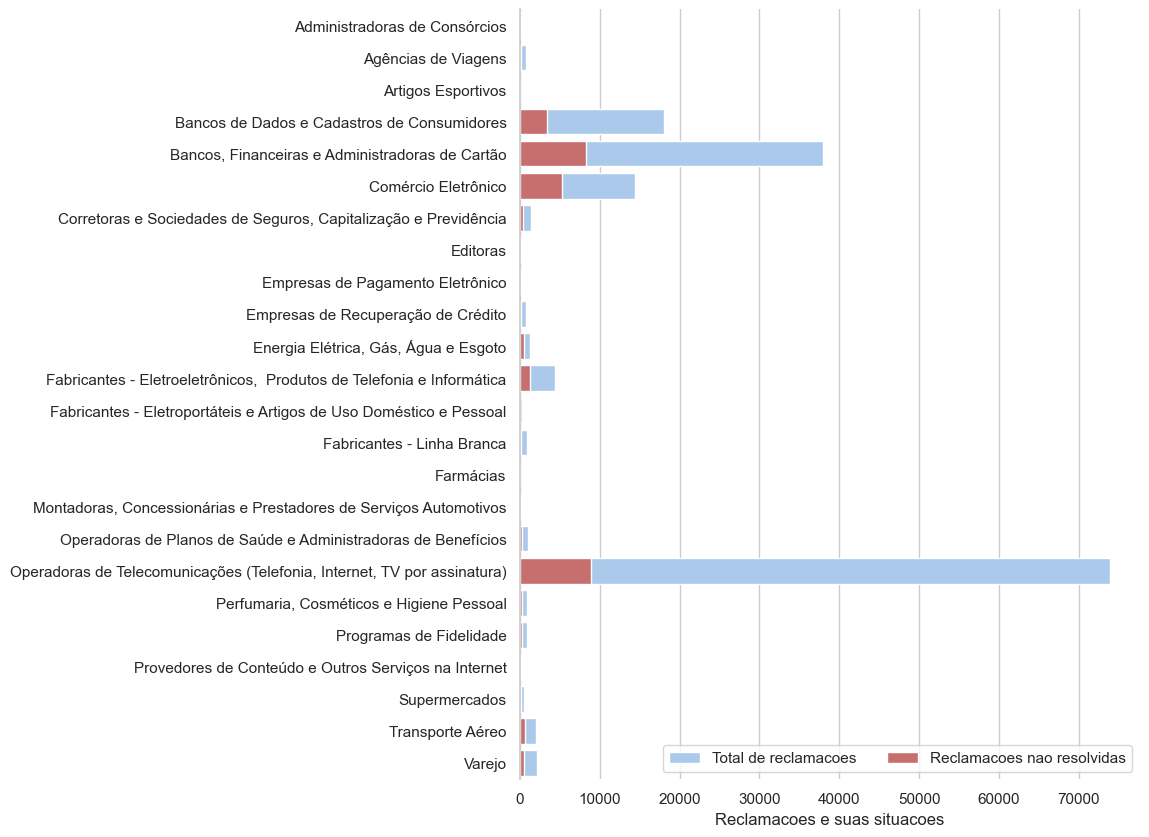

In [52]:
import seaborn as sns

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("pastel")
sns.barplot(x=x.values, y=x.keys(), label="Total de reclamacoes", color="b")

sns.set_color_codes("muted")
sns.barplot(x=x1.values, y=x1.keys(),label="Reclamacoes nao resolvidas", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Reclamacoes e suas situacoes")
sns.despine(left=False, bottom=True)

Avaliando o desempenho de instituições financeiras.

In [58]:
df = dados[dados['Segmento de Mercado']==u'Bancos, Financeiras e Administradoras de Cartão']
df = df[df[u'Área']==u'Serviços Financeiros']

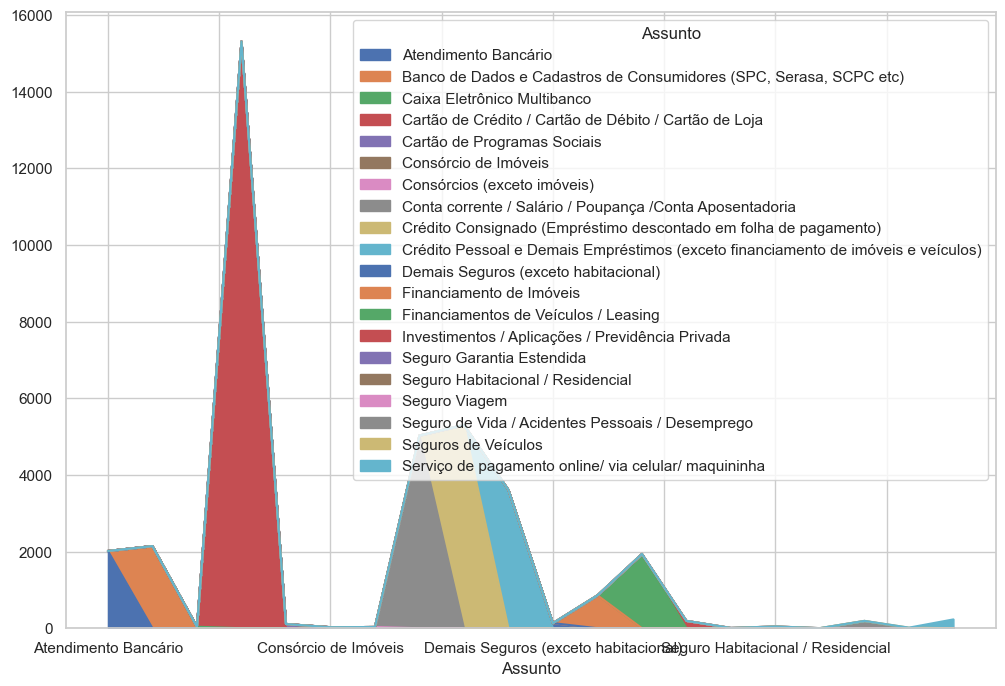

In [60]:
fig, ax = plt.subplots(figsize=(12,8))
df.groupby('Assunto')['Assunto'].value_counts().unstack().plot.area(ax=ax)
plt.show()